Pelindung Tripurnama Giawa

In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip


--2020-10-23 08:02:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  3.84MB/s    in 51s     

2020-10-23 08:03:49 (6.02 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



In [18]:
! unzip /content/rockpaperscissors.zip

Archive:  /content/rockpaperscissors.zip
replace __MACOSX/._rockpaperscissors? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._rockpaperscissors  
replace rockpaperscissors/README_rpc-cv-images.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: rockpaperscissors/README_rpc-cv-images.txt  
replace __MACOSX/rockpaperscissors/._README_rpc-cv-images.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [19]:
import zipfile, os

In [20]:
root_path = '/content/rockpaperscissors/rps-cv-images'

In [21]:
os.listdir(root_path)

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

In [47]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4)

In [48]:
train_generator = train_datagen.flow_from_directory(
    root_path,
    target_size=(100, 150), 
    class_mode = 'categorical',
    shuffle=True,
    subset='training')
val_generator = train_datagen.flow_from_directory(
    root_path,
    target_size=(100, 150), 
    class_mode = 'categorical',
    shuffle=True,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 10, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10880)            

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [52]:
history = model.fit(
    train_generator,
    steps_per_epoch=32, #berapa batch yang akan dieksekusi pada setiap epoch
    epochs=10,
    validation_data=val_generator, #menampilkan akurasi pengujian data validasi
    validation_steps=8, #berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2)

Epoch 1/10
32/32 - 20s - loss: 1.1065 - accuracy: 0.4135 - val_loss: 0.9855 - val_accuracy: 0.4688
Epoch 2/10
32/32 - 23s - loss: 0.7334 - accuracy: 0.6973 - val_loss: 0.4650 - val_accuracy: 0.8398
Epoch 3/10
32/32 - 19s - loss: 0.3436 - accuracy: 0.8853 - val_loss: 0.2468 - val_accuracy: 0.9375
Epoch 4/10
32/32 - 19s - loss: 0.1789 - accuracy: 0.9447 - val_loss: 0.1717 - val_accuracy: 0.9453
Epoch 5/10
32/32 - 19s - loss: 0.1441 - accuracy: 0.9517 - val_loss: 0.1820 - val_accuracy: 0.9219
Epoch 6/10
32/32 - 19s - loss: 0.1532 - accuracy: 0.9537 - val_loss: 0.7115 - val_accuracy: 0.8086
Epoch 7/10
32/32 - 20s - loss: 0.2826 - accuracy: 0.8965 - val_loss: 0.1383 - val_accuracy: 0.9609
Epoch 8/10
32/32 - 19s - loss: 0.0921 - accuracy: 0.9738 - val_loss: 0.1206 - val_accuracy: 0.9570
Epoch 9/10
32/32 - 19s - loss: 0.0607 - accuracy: 0.9769 - val_loss: 0.0857 - val_accuracy: 0.9727
Epoch 10/10
32/32 - 19s - loss: 0.0680 - accuracy: 0.9799 - val_loss: 0.0912 - val_accuracy: 0.9766


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


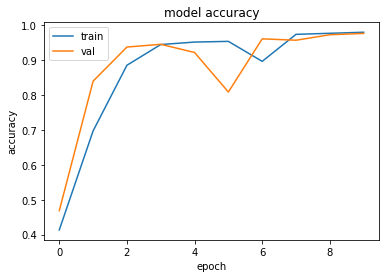

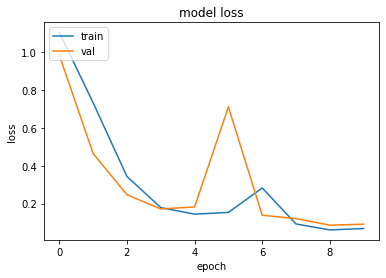

In [53]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 1e1VCnCEApnFh9Oo.png to 1e1VCnCEApnFh9Oo.png
1e1VCnCEApnFh9Oo.png
rock


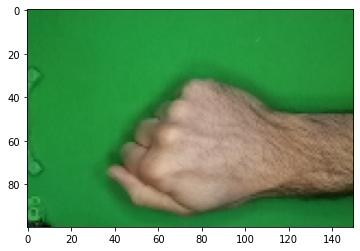

In [55]:
from google.colab import files
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')